In [39]:
# Import jeopardy.csv and create a dataframe from the data Find out the following:
# a. How many rows are there in the dataframe? What does a row represent in this
# dataset? What is the “grain”?
# b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
# c. How many unique shows were there each year?
# d. How many times was each category used?
# e. Which month (over the years) has had the most shows?
# f. Are there any answers that appeared multiple times? Find the questions for the top
# three most common answers.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "C:/Users/rsagu/OneDrive/Documents/launch_code/Data-Science-Assignments/course_material/week_05/JEOPARDY_CSV.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file_to_load)

#### a. How many rows are there in the dataframe? 

In [41]:
row_count = len(df.index)
print("Numer of rows =", row_count)

Numer of rows = 216930


#### What does a row represent in this dataset? What is the “grain”?

In [42]:
# A dataset is a collection of rows and columns. For example, in a tabular data, a data set 
# corresponds to one or more database tables, where each column of a table represents a particular
# variable, and each row corresponds to a given record of that data.

# Grain:
# The GRAIN or GRANULARITY of the table refers to the level at which we store the measurement in 
# fact table.

##### b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

In [43]:
# Data Cleaning means to refine the raw or source data that is collected to render it to be 
# leveraged for Data analysis to facilitate in retrieving meaningful insights and abstract 
# visualizations.
# Eg of dirty data: 1) In our jeopardy data, i have found that there are 2 missing vlues in the 
# 'Answer' column; 
# 2) Also, One more thing that I’ve noticed is that there’s an extra space in the column names 
# viz., ' Air Date', ' Round', ' Category', ' Value', ' Question', ' Answer'   
# Oftentimes the source data comes with duplicate records and we need to remove such duplicates to
# avoid data redundancy as our analysis with duplicates could lead to misleading insights.

#### c. How many unique shows were there each year? 

In [44]:
#step1: Rename the columns that are with a leading space in their names
df.rename(columns={
    ' Air Date': 'Date',
    ' Round': 'Round',
    ' Category': 'Category',
    ' Value': 'Value',
    ' Question': 'Question',
    ' Answer': 'Answer'
}, inplace=True)

#step2: subset the source data to have only the desired columns(show number & Date in this case)
jeo = df[['Show Number', 'Date' ]]

#step3: Remove duplicates on shownumber and air date to get distinct values
x = jeo.drop_duplicates(subset=['Show Number', 'Date'], keep='last')

#step4: Sorting by 'Show Number' column 
x.sort_values(by=['Show Number'])

#Step5: Get only the Year from the "Date" column as we need to get number of shows per distinct year
from datetime import datetime
x['year'] = pd.DatetimeIndex(x['Date']).year

#step6: Get the count of shows per each year
stat = x.groupby('year').count()

#step7: Create a Variable named "Year" from stat.index
stat['year'] = stat.index

stat

C:\Users\rsagu\AppData\Local\Temp/ipykernel_2560/309000862.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['year'] = pd.DatetimeIndex(x['Date']).year


,Show Number,Date,year
year,,,
1984,23,23,1984
1985,16,16,1985
1986,25,25,1986
1987,22,22,1987
1988,22,22,1988
1989,36,36,1989
1990,73,73,1990
1991,24,24,1991
1992,32,32,1992


#### d. How many times was each category used?

In [45]:
ncat = df.Category.value_counts().nlargest(10)
ncat

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
Name: Category, dtype: int64

#### e. Which month (over the years) has had the most shows?

In [46]:
#step1: Rename the columns that are with a leading space in their names
df.rename(columns={
    ' Air Date': 'Date',
    ' Round': 'Round',
    ' Category': 'Category',
    ' Value': 'Value',
    ' Question': 'Question',
    ' Answer': 'Answer'
}, inplace=True)

#step2: subset the source data to have only the desired columns(show number & Date in this case)
show_month = df[['Show Number', 'Date' ]]

#step3: Remove duplicates on shownumber and air date to get distinct values
dshmon = show_month.drop_duplicates(subset=['Show Number', 'Date'], keep='last')

#step4: Sorting by 'Show Number' column 
dshmon.sort_values(by=['Show Number'])

#Step5: Get only the Year from the "Date" column as we need to get number of shows per distinct year
from datetime import datetime
dshmon['Month'] = pd.DatetimeIndex(dshmon['Date']).month
dshmon

show_stat = dshmon[['Show Number', 'Month' ]]

show_stat.sort_values(by=['Month'])
show_stat

#nshow_stat = show_stat.Month.value_counts()
#nshow_stat
#step6: Get the count of shows per each year
nshow_stat = show_stat.groupby('Month').count()
nshow_stat

#step7: Create a Variable named "Year" from stat.index
nshow_stat['Month'] = nshow_stat.index
nshow_stat


C:\Users\rsagu\AppData\Local\Temp/ipykernel_2560/3443149237.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dshmon['Month'] = pd.DatetimeIndex(dshmon['Date']).month


,Show Number,Month
Month,,
1,355,1
2,293,2
3,329,3
4,330,4
5,351,5
6,321,6
7,256,7
9,272,9
10,347,10


#### f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers. 

In [47]:
# Are there any answers that appeared multiple times? Find the questions for the top three most 
# common answers.
# Yes, I have noticed that all the answers were looking for a Frequency of a specific data point 
# over a time period to observe the trend.
# The question 1.d was just looking for frequency of a category.


#### 2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

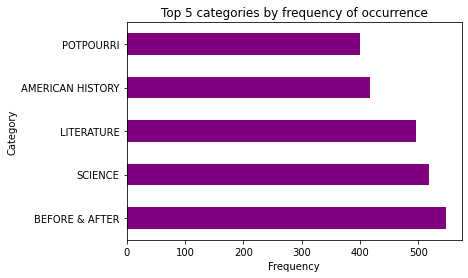

In [49]:
top5_cat = df[['Category']]
top5_cat['Category'].value_counts()[:5].plot(kind='barh', color='purple')


plt.xlabel("Frequency")
plt.ylabel("Category")
plt.title("Top 5 categories by frequency of occurrence")

plt.show()